# Analysis of the public bike dataset in NYC
## by Seunggyun Han

## Investigation Overview

> Describe the overall goals of your presentation here.

## Dataset Overview

> In this project, I will investigate [NYC CitiBike trip dataset](https://s3.amazonaws.com/tripdata/index.html) from June to August in 2020. This data set includes information about individual rides made in NYC.

In [7]:
# import all packages and set plots to be embedded inline
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydeck

mapbox_key='pk.eyJ1Ijoic2doYW4iLCJhIjoiY2szamxqbjZnMGtmbTNjbXZzamh4cng3dSJ9.GGv4GVVoZ811d6PKi54PrA'

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [8]:
# load in the dataset into a pandas dataframe
df_bike = pd.read_csv('data/citibike_master.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> Write a comment about your visualization here. The visualization should be in
the next cell, as a sub-slide type. Make sure your visualizations are polished!

In [15]:
df_bike_station = df_bike.groupby('start station id').mean()[['start station latitude', 'start station longitude']]
df_bike_station = df_bike_station.rename(columns={
    'start station latitude':'lat',
    'start station longitude':'lng'
})
df_bike_station_count = df_bike.groupby('start station id').count()[['tripduration']].rename(columns={'tripduration':'startcount'})
df_bike_station = df_bike_station.join(df_bike_station_count)
# set the layer of deck.gl
layer_start_static = pydeck.Layer(
    "HeatmapLayer",
    data=df_bike_station,
    opacity=0.7,
    get_position=['lng', 'lat'],
    aggregation = '"MEAN"',
    get_weight='startcount',
)
# set the view point
view = pydeck.ViewState(longitude = df_bike_station['lng'].mean(), latitude = df_bike_station['lat'].mean())
view.zoom = 11
# draw a map
r_start_static = pydeck.Deck(
    layers=[layer_start_static],
    initial_view_state= view,
    mapbox_key=mapbox_key,
)
r_start_static.show()

DeckGLWidget(google_maps_key=None, json_input='{"initialViewState": {"latitude": 40.74310602550399, "longitude…

## (Visualization 2)

> You should have at least three visualizations in your presentation,
but feel free to add more if you'd like!

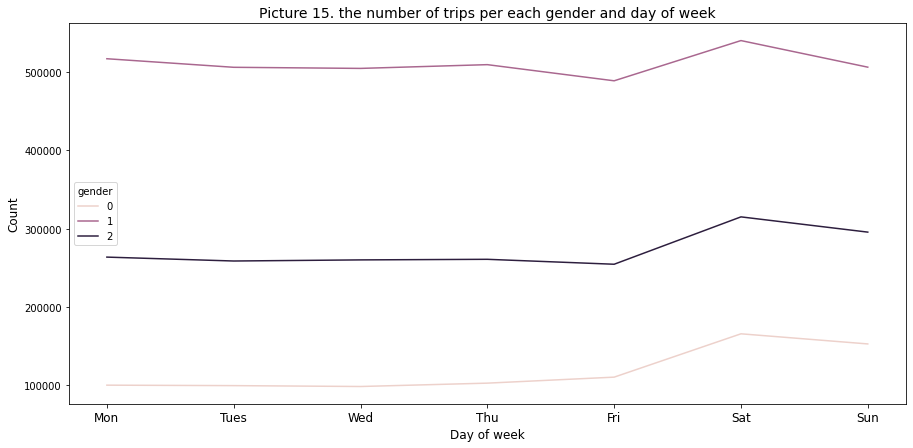

In [21]:
# calculate the numbers of trips per each gender and day of week
df_bike_count = df_bike.groupby(['dayofweek',
                                 'gender'],
                                 as_index=False).count()[['dayofweek',
                                                          'gender',
                                                          'tripduration']].rename(columns={'tripduration':'count'})

plt.figure(figsize=(15,7))
plt.title('Picture 15. the number of trips per each gender and day of week', fontsize=14);
sns.lineplot(data=df_bike_count, x='dayofweek', y='count', hue='gender');
plt.xticks(ticks = [0,1,2,3,4,5,6], labels = ['Mon','Tues','Wed','Thu','Fri','Sat','Sun'],fontsize='12');
plt.xlabel('Day of week', fontsize=12);
plt.ylabel('Count', fontsize=12);

## (Visualization 3)

>

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [32]:
!jupyter nbconvert slide_deck1.ipynb --to slides --template-file output_toggle.tpl

[NbConvertApp] Converting notebook slide_deck1.ipynb to slides
Traceback (most recent call last):
  File "C:\Users\hsg82\AppData\Local\Continuum\anaconda3\envs\dand\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\hsg82\AppData\Local\Continuum\anaconda3\envs\dand\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\hsg82\AppData\Local\Continuum\anaconda3\envs\dand\lib\site-packages\traitlets\config\application.py", line 837, in launch_instance
    app.start()
  File "C:\Users\hsg82\AppData\Local\Continuum\anaconda3\envs\dand\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\hsg82\AppData\Local\Continuum\anaconda3\envs\dand\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Users\hs

In [28]:
!jupyter nbconvert --TemplateExporter.extra_template_basedirs=C:\Users\hsg82\Documents\GitHub\DAND_data_visualization

This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePreprocessor.enabled=True]
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too

In [26]:
! jupyter --paths

config:
    C:\Users\hsg82\.jupyter
    C:\Users\hsg82\AppData\Local\Continuum\anaconda3\envs\dand\etc\jupyter
    C:\ProgramData\jupyter
data:
    C:\Users\hsg82\AppData\Roaming\jupyter
    C:\Users\hsg82\AppData\Local\Continuum\anaconda3\envs\dand\share\jupyter
    C:\ProgramData\jupyter
runtime:
    C:\Users\hsg82\AppData\Roaming\jupyter\runtime
